<a href="https://colab.research.google.com/github/mpaydar/CS381/blob/main/_Bayat_Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
dataframe=pd.read_csv('https://raw.githubusercontent.com/mpaydar/CS381/main/Quiz4/HDMA%20Boston%20Housing%20Data.csv')
print(dataframe.head())

   Unnamed: 0    dir    hir       lvr  ccs  mcs pbcr dmi self single  uria  \
0           1  0.221  0.221  0.800000  5.0  2.0   no  no   no     no   3.9   
1           2  0.265  0.265  0.921875  2.0  2.0   no  no   no    yes   3.2   
2           3  0.372  0.248  0.920398  1.0  2.0   no  no   no     no   3.2   
3           4  0.320  0.250  0.860465  1.0  2.0   no  no   no     no   4.3   
4           5  0.360  0.350  0.600000  1.0  1.0   no  no   no     no   3.2   

   comdominiom black deny  
0            0    no   no  
1            0    no   no  
2            0    no   no  
3            0    no   no  
4            0    no   no  


# Introduction

## Attribute:
# Numerical Attribute:
**dir**: debt payments to total income ratio
      
      A low debt-to-income ratio demonstrates a good 
      balance between debt and income. In general, 
      the lower the percentage, the better the chance 
      you will be able to get the loan or line of 
      credit you want.

      Lenders prefer to see a debt-to-income ratio 
      smaller than **36%**, with no more than **28%** of that 
      debt going towards servicing your mortgage





**hir**: housing expenses to income ratio

    The **threshold **for the housing expense ratio set 
    by lenders for mortgage loan approvals is 
    typically equal to **28%.** A ratio higher than 28% 
    can be accepted by a lender if the loan-to-value 
    ratio (LTV) is low and/or the borrower 
    demonstrates an excellent credit history.

    Keeping monthly housing expenses to 28% of the 
    borrower’s gross income assists in estimating how 
    much the debtor can afford to pay monthly on a 
    mortgage.

**lvr**:ratio of size of loan to assessed value of property
   
    Generally, 80% LTV is considered a good 
    loan-to-value ratio. If you’re buying a home, you 
    achieve an 80% LTV by making a 20% down payment.

    Homeowners with an 80% LTV do not have to pay for 
    private mortgage insurance (PMI). And they 
    typically qualify for lower interest rates. So 
    there are real perks to making a big down payment 
    and getting your LTV to 80% or lower.


**ccs**:consumer credit score from 1 to 6 (a low value being a good score)

**mcs**: mortgage credit score from 1 to 4 (a low value being a good score)

**uria:** 1989 Massachusetts unemployment rate in the applicant's industry

# Categorical Attribute:
**pbcr**: public bad credit record ? Yes/No

**dmi**: denied mortgage insurance ? Yes/No

**self**:self employed ? Yes/No

**single**: is the applicant single ? Yes/No




**condominium**:is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package) 0/1

A condominium (or condo for short) is a building structure divided into several units that are each separately owned, surrounded by common areas that are jointly owned. (wikipedia)






**black**: is the applicant black ? Yes/No


**deny**: mortgage application denied ?  Yes/No

#Restructuring the header file

In [36]:
dataframe=dataframe.drop('Unnamed: 0',axis=1)
print(dataframe.head())
head=['debtToIncome','HouseToIncome','LoanTopropertyValue','ConsumerCredit','MortgageCredit','BadCredit','DenMorgeInsur.','selfEmploy','IsSingle','MasUnEmploymentRate','condominium','black','mortgageDecision']
dataframe.columns=head
print(dataframe.head())
print("--------------------------------------")
print("")
print("Number of observation and attribute")
print("")
print(dataframe.shape)







     dir    hir       lvr  ccs  mcs pbcr dmi self single  uria  comdominiom  \
0  0.221  0.221  0.800000  5.0  2.0   no  no   no     no   3.9            0   
1  0.265  0.265  0.921875  2.0  2.0   no  no   no    yes   3.2            0   
2  0.372  0.248  0.920398  1.0  2.0   no  no   no     no   3.2            0   
3  0.320  0.250  0.860465  1.0  2.0   no  no   no     no   4.3            0   
4  0.360  0.350  0.600000  1.0  1.0   no  no   no     no   3.2            0   

  black deny  
0    no   no  
1    no   no  
2    no   no  
3    no   no  
4    no   no  
   debtToIncome  HouseToIncome  LoanTopropertyValue  ConsumerCredit  \
0         0.221          0.221             0.800000             5.0   
1         0.265          0.265             0.921875             2.0   
2         0.372          0.248             0.920398             1.0   
3         0.320          0.250             0.860465             1.0   
4         0.360          0.350             0.600000             1.0   

   Mortg

#Checking for null values

In [37]:
print(dataframe.isnull().sum())
print("--------------------------------------")
print("Displaying the percentage of missing data")
print("")

# Displaying the percentage of missing data:
p=dataframe.isnull().sum()/(dataframe.shape[0])*100
p[p>0]


debtToIncome           0
HouseToIncome          0
LoanTopropertyValue    0
ConsumerCredit         0
MortgageCredit         0
BadCredit              1
DenMorgeInsur.         0
selfEmploy             1
IsSingle               0
MasUnEmploymentRate    0
condominium            0
black                  0
mortgageDecision       0
dtype: int64
--------------------------------------
Displaying the percentage of missing data



BadCredit     0.041999
selfEmploy    0.041999
dtype: float64

There are no values missing except 2 values which include one missing valuefor BadCredit and another one for selfEmploy attribute.

#Visualizing attribute attribute

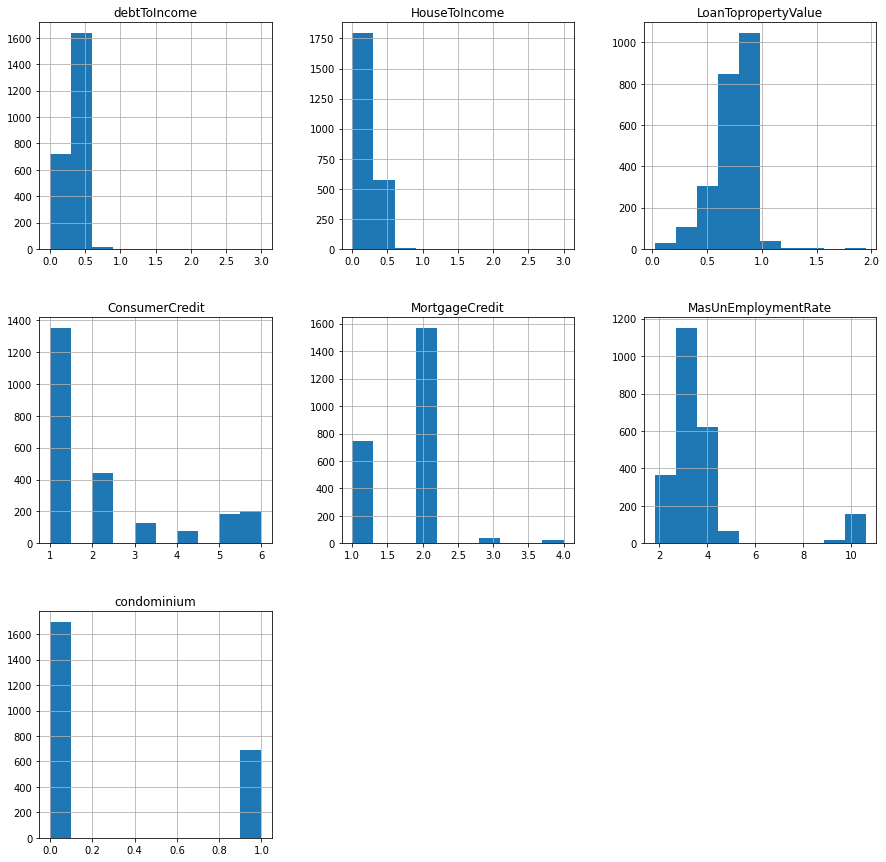

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


dataframe.hist(figsize=(15,20))

    

plt.gcf().set_size_inches(15, 15)
plt.show()

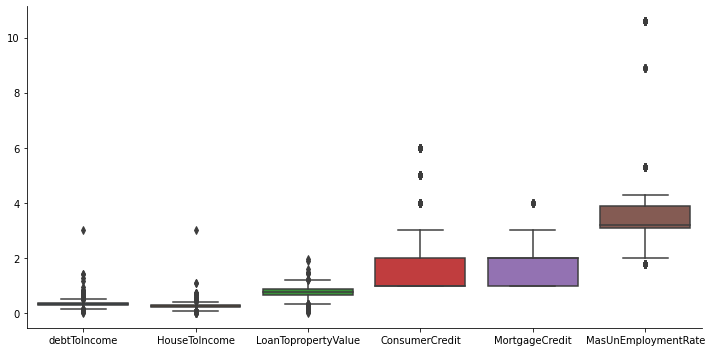

In [39]:
# Check the box plots for some our data:

values=dataframe[['debtToIncome' , 'HouseToIncome' , 'LoanTopropertyValue' , 'ConsumerCredit' ,'MortgageCredit','MasUnEmploymentRate' ]]
sns.catplot(data=values,kind='box',height=5,aspect=2)






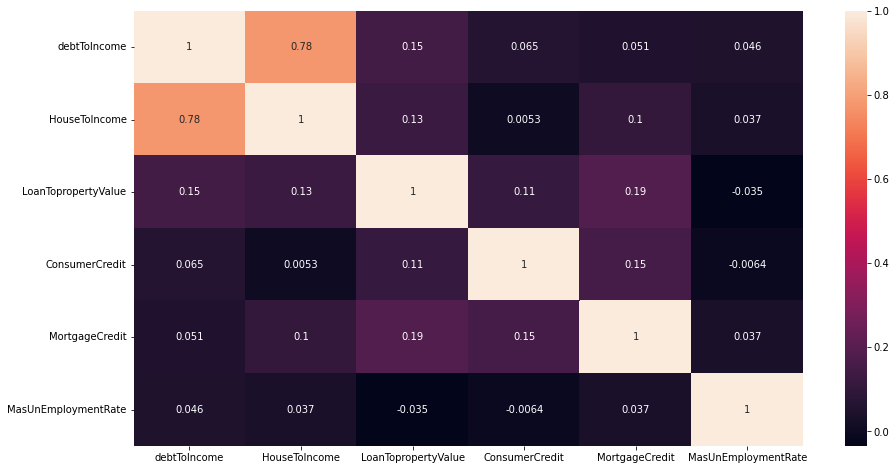

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(values.corr(),annot=True)

In [41]:
dataframe.describe()

,debtToIncome,HouseToIncome,LoanTopropertyValue,ConsumerCredit,MortgageCredit,MasUnEmploymentRate,condominium
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


The Max values higher that 1 does not make sense for debtToIncome	HouseToIncome	LoanTopropertyValuesince. Anything higher than 1 means for these ratios doesn't worth looking since that would be an immediate rejection base on the domain knowlege that was gained from multiple resources. 



In [42]:
x=dataframe.debtToIncome.unique()
x=pd.DataFrame(data=x)
x.head()
# y=dataframe.mortgageDecision.unique()
# y


,0
0,0.221
1,0.265
2,0.372
3,0.320
4,0.360


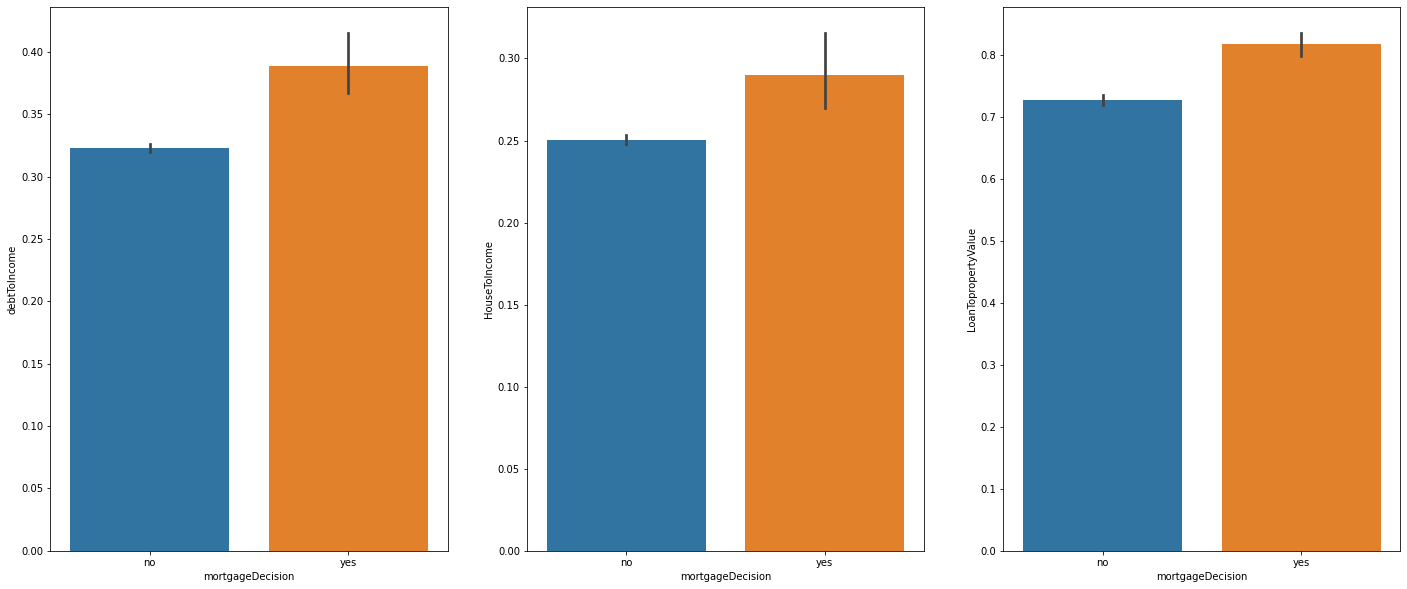

In [43]:
plt.subplot(1,3,1)
sns.barplot(x="mortgageDecision",y="debtToIncome",data=dataframe)




plt.subplot(1,3,2)
sns.barplot(x="mortgageDecision",y="HouseToIncome",data=dataframe)



plt.subplot(1,3,3)
sns.barplot(x="mortgageDecision",y="LoanTopropertyValue",data=dataframe)




plt.subplots_adjust(right=2)

plt.gcf().set_size_inches(10,10)
plt.show()

These bar graphs explain the fact that when  a mortgage desicion is being made , there are many factors effecting the outcome of the decision. 

You could see that if your debToIncome is within 35% to 40% you would get a yes mortgage decision. If you are have less debt to income  it means you might not a real player in the business field who makes money and could be consider as risk factor. 


28% HouseToIncome ration could make a yes on the mortgage decision


If the loan, you are qualified for cover 80% of your house value , the mortage decision will lean toward a yes!





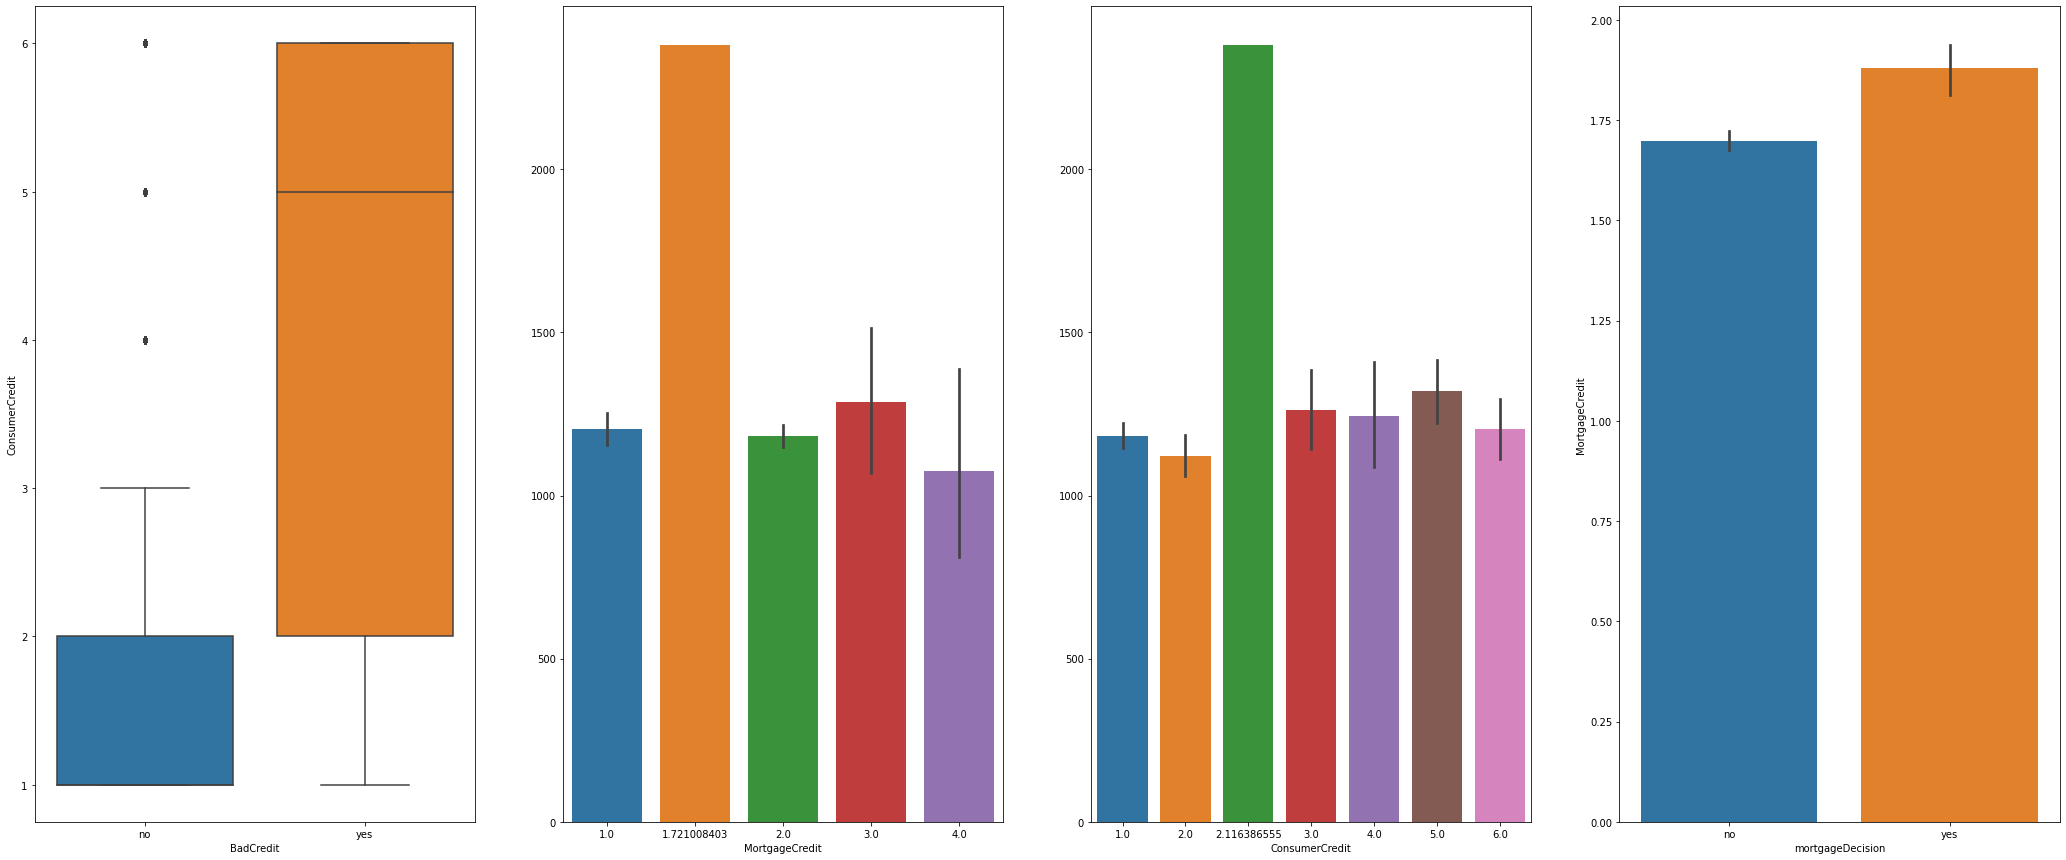

In [44]:
# plt.bar(dataframe['ConsumerCredit'], str(dataframe["BadCredit"]),color='slateblue')



plt.subplot(1,4,1)
sns.boxplot(x='BadCredit',y='ConsumerCredit',data=dataframe)




plt.subplot(1,4,2)
x_axis=[]
df_copy=dataframe.to_numpy()
for i in range(len(df_copy)):
  x_axis.append(i)
sns.barplot(x='MortgageCredit',y=x_axis,data=dataframe)


plt.subplot(1,4,3)
x_axis=[]
df_copy=dataframe.to_numpy()
for i in range(len(df_copy)):
  x_axis.append(i)
sns.barplot(x='ConsumerCredit',y=x_axis,data=dataframe)









plt.subplot(1,4,4)
sns.barplot(x='mortgageDecision',y='MortgageCredit',data=dataframe)







# sns.barplot(x=x_axis,y='MortgageCredit',data=dataframe)

plt.subplots_adjust(right=2)
plt.gcf().set_size_inches(15,15)

# plt.title('BadCredit by MortgageDecision', fontsize=27)
# plt.xlabel('BadCredit', fontsize=19)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.tick_params(left=False)
# sns.despine(left=True)
plt.show()


In [45]:
dataframe.MortgageCredit.count()

2381

You could see that there are some outliers as high as 6 which is a very bad score but yet it is categorized as  Not Bad Credit. After gaining some domain knowlege, these outliers could not be explained under any circumstance.

However you could see average of applicants are having credit score of 5 which is considered as bad credit. 

One fact from this graph that's eye catching and need attention is that, credit score of 2 is overlapping between yes and no bad credit category. Probably some mortgage companies would consider 2 as good and others as bad. 




# MortgageCredit
when mortgage lenders review your credit history, it's likely they'll use a credit score formula tailored to determine what kind of risk you'll be for a mortgage loan. The formula may weigh pieces of your credit history differently in order to test for that risk factor.

Another reason your credit scores might look different to lenders is because they were updated since the last time you checked.

Your credit scores might also differ based on which credit reporting agency your lender uses. Since each agency independently determines your credit scores based on the information in their individual databases, there may sometimes be slight differences.

In the given dataset, you could see most of the applicant having good mortgage credit scores. 

# Consumer Credit:
More Applicant having good credit score which gives them better chance of getting approve for a line.



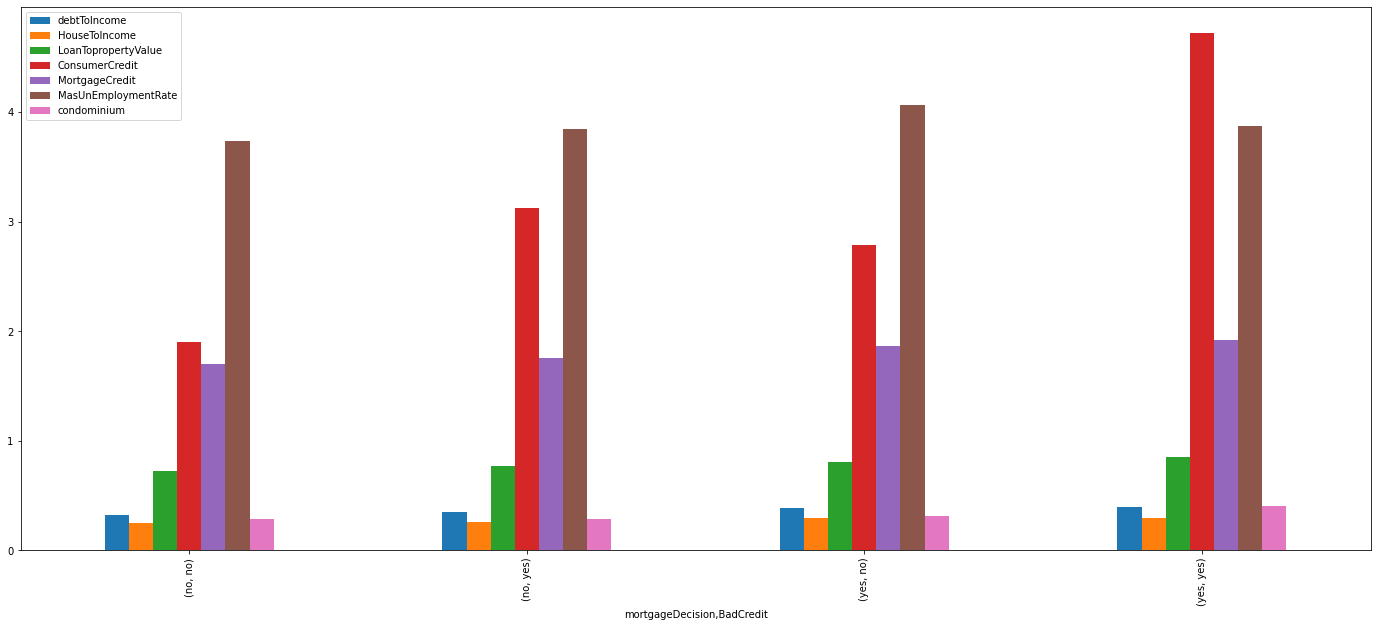

In [46]:
# 'DenMorgeInsur.','selfEmploy','IsSingle','MasUnEmploymentRate','condominium','black','mortgageDecision'

dataframe.groupby(['mortgageDecision','BadCredit']).mean().plot(kind='bar')





plt.subplots_adjust(right=2)
plt.gcf().set_size_inches(10,10)
plt.show()

It's a little unclear to see why mean of applicant with a bad credit and high Massachuset Unemployment rate will make will get approved for the loan. Probably, it's because we are have not yet scaled our data so we can really get any useful insight from the graph

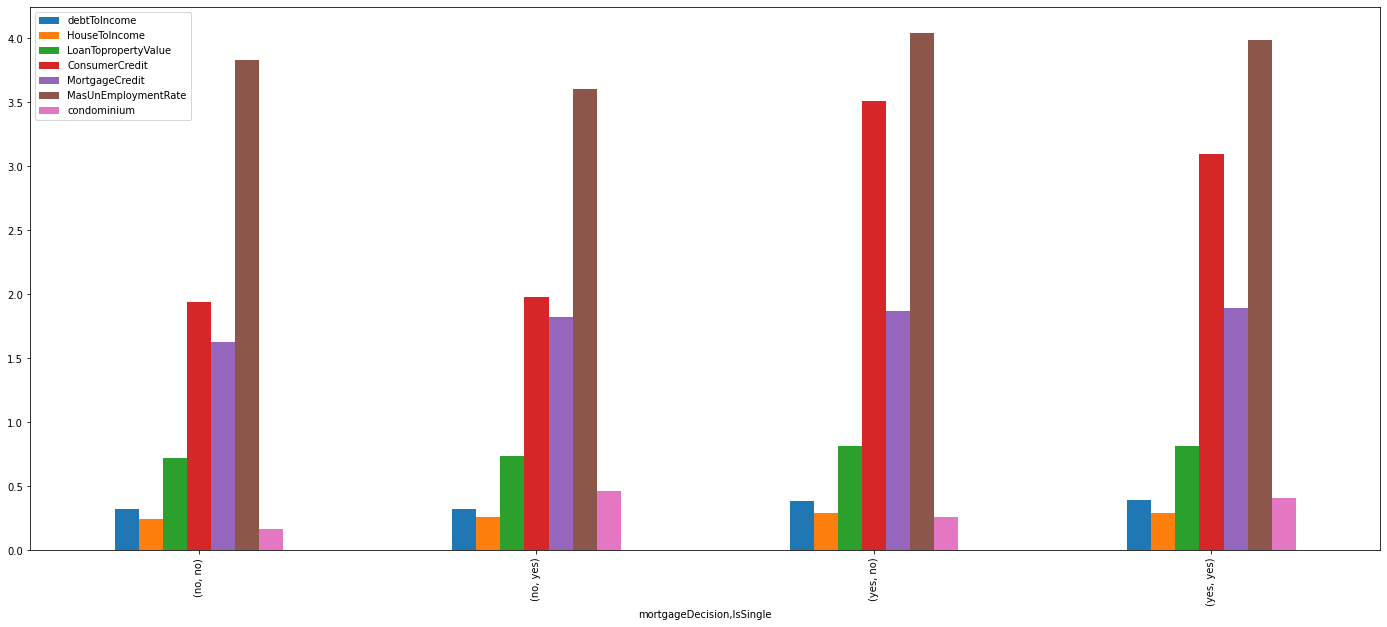

In [47]:

dataframe.groupby(['mortgageDecision','IsSingle']).mean().plot(kind='bar')
plt.subplots_adjust(right=2)

plt.gcf().set_size_inches(10,10)
plt.show()

The same argument goes to this bar graphs since our data is not scaled , we can't really extract any useful information from the graph. 

# Data Prepration 

## Getting rid off the N/A values

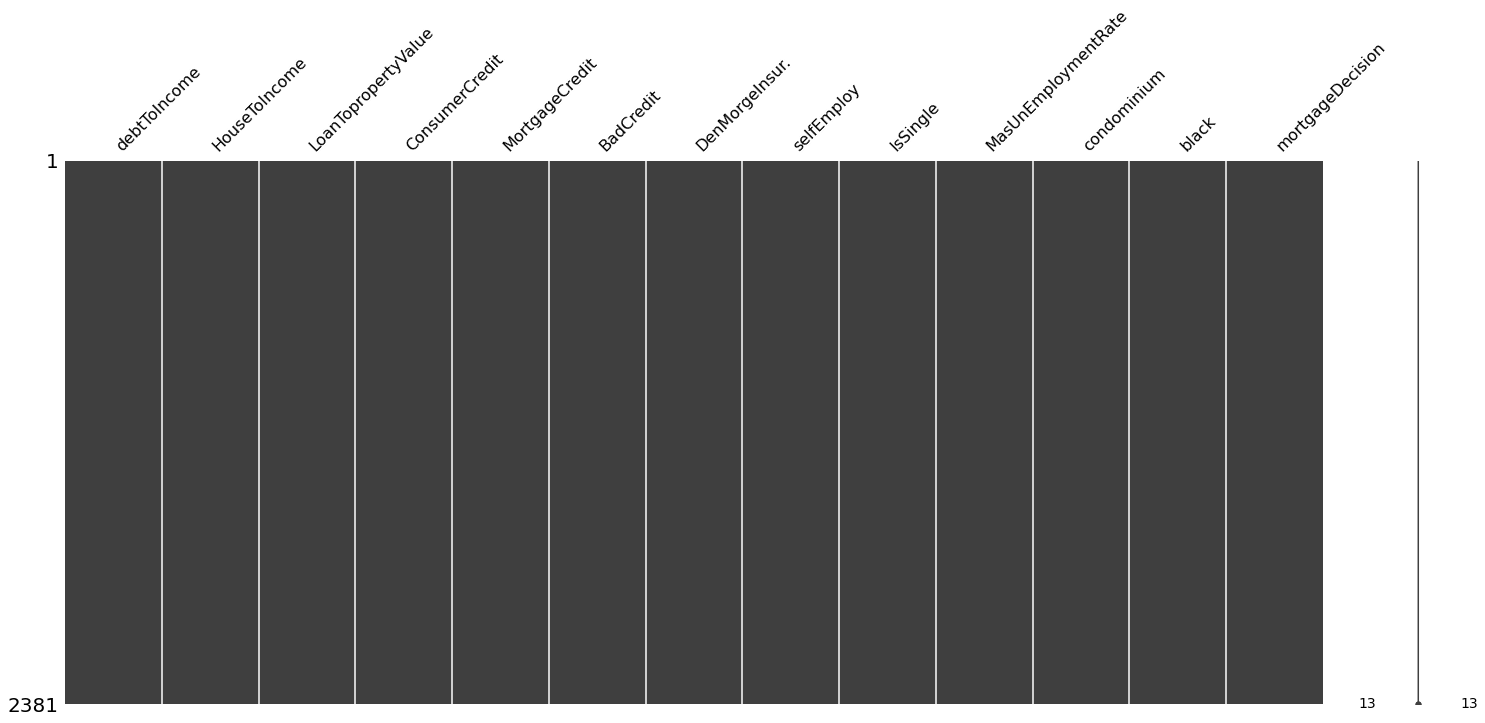

In [48]:
# making a copy to work with
df_copy=dataframe


df_copy['BadCredit']=df_copy['BadCredit'].fillna(0)
df_copy['selfEmploy']=df_copy['selfEmploy'].fillna(0)
import missingno as msno
ax=msno.matrix(df_copy)


In [49]:
# Filtering Data to be homogenous within columns

dataframe ['selfEmploy']= dataframe ['selfEmploy'].replace(0, 'yes')
dataframe ['BadCredit']= dataframe ['BadCredit'].replace(0, 'yes')





# Feature Engineering & Scaling the data


In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold, cross_val_score, train_test_split




import numpy as np
df_copy2=df_copy
# df_copy2 =df_copy2[:-1]






target=df_copy['mortgageDecision']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['mortgageDecision']
df_copy2['mortgageDecision']=interim['mortgageDecision']

target=df_copy['black']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['black']
df_copy2['black']=interim['black']






target=df_copy['IsSingle']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['IsSingle']
df_copy2['IsSingle']=interim['IsSingle']





target=df_copy['selfEmploy']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['selfEmploy']
df_copy2['selfEmploy']=interim['selfEmploy']







target=df_copy['DenMorgeInsur.']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['DenMorgeInsur.']
df_copy2['DenMorgeInsur.']=interim['DenMorgeInsur.']












target=df_copy['BadCredit']
le=preprocessing.LabelEncoder()
interim=le.fit_transform(target)
interim=pd.DataFrame(interim)
interim.columns=['BadCredit']
df_copy2['BadCredit']=interim['BadCredit']
















scaler=MinMaxScaler(feature_range=(0,1))
rescaled_featrue_target=scaler.fit_transform(df_copy2)
rescaled_data=pd.DataFrame(rescaled_featrue_target)
rescaled_data.columns=head

# rescaled_data
target=rescaled_data['mortgageDecision'].copy()
features=rescaled_data.drop('mortgageDecision',axis=1)
f1=rescaled_data[['ConsumerCredit','debtToIncome'	,'HouseToIncome','LoanTopropertyValue'	,'ConsumerCredit'	,'MortgageCredit'	,'MasUnEmploymentRate'	,'condominium']]
features=f1
print(type(f1))
# features=[0<features]
# features=features[:-1]






# print(df)

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=0)









from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV






# cv_estimator=RandomForestClassifier(random_state=42)
# cv_estimator.fit(x_train,y_train)
# cv_selector=RFECV(cv_estimator,cv=10,step=1)
# cv_selector=cv_selector.get_support()







# target2=rescaled_data['ConsumerCredit'].copy()
# features2=rescaled_data.drop('ConsumerCredit',axis=1)



# target3=rescaled_data['MortgageCredit'].copy()
# features3=rescaled_data.drop('ConsumerCredit',axis=1)









# Selection

selection_kBest=SelectKBest(score_func=chi2,k=1).fit(features,target)
# # Find which columns were chosen
features_kBest=selection_kBest.get_support()


# # Second selection
# selection_kBest2=SelectKBest(f_regression,k=5).fit(features2,target2)
# # # Find which columns were chosen
# features_kBest2=selection_kBest.get_support()


# # Third Selection
# selection_kBest3=SelectKBest(f_regression,k=5).fit(features3,target3)
# # # Find which columns were chosen
# features_kBest3=selection_kBest.get_support()















print('Overall features:',dataframe.columns,'\n')
print('chosen features:',features.columns[features_kBest],'\n')













<class 'pandas.core.frame.DataFrame'>
Overall features: Index(['debtToIncome', 'HouseToIncome', 'LoanTopropertyValue',
       'ConsumerCredit', 'MortgageCredit', 'BadCredit', 'DenMorgeInsur.',
       'selfEmploy', 'IsSingle', 'MasUnEmploymentRate', 'condominium', 'black',
       'mortgageDecision'],
      dtype='object') 

chosen features: Index(['ConsumerCredit'], dtype='object') 



# Creating Model

In [52]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LogisticRegression


# model01=LinearRegression()



# print(features)
print(target)
print()
lin_reg=LinearRegression().fit(x_train,y_train.ravel())
r_sq2=lin_reg.score(features,target)
print(r_sq2)



# lin_reg=LinearRegression().fit(x_train3,y_train3.ravel())
# r_sq3=lin_reg.score(features3,target3)
# print(r_sq3)





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2376    0.0
2377    0.0
2378    1.0
2379    1.0
2380    0.0
Name: mortgageDecision, Length: 2381, dtype: float64

0.11555498299528955


# Source 


https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp



https://corporatefinanceinstitute.com/resources/knowledge/credit/housing-expense-ratio/


https://themortgagereports.com/13598/loan-to-value-for-mortgages-explained-in-plain-english


https://www.forbes.com/sites/nickclements/2016/11/28/5-reasons-people-with-700-credit-scores-still-get-rejected/?sh=720cb4786de2